## BST 267: Introduction to Social and Biological Networks (2022)

# Homework 3


### Question 1: Zachary Karate Club (2 points)

We were introduced to the Zachary Karate Club network in Lecture 1. It's a small network, which makes it easy to visualize it, and it's often used as a basic test case for community detection algorithms. The network is included as part of the NetworkX library, but you'll likely need to explore documentation to find how to use it. Write code to visualize the Karate Club network. Include node labels in the visualization. You should also save the x-y positions of the nodes for Q4.

<IPython.core.display.Javascript object>


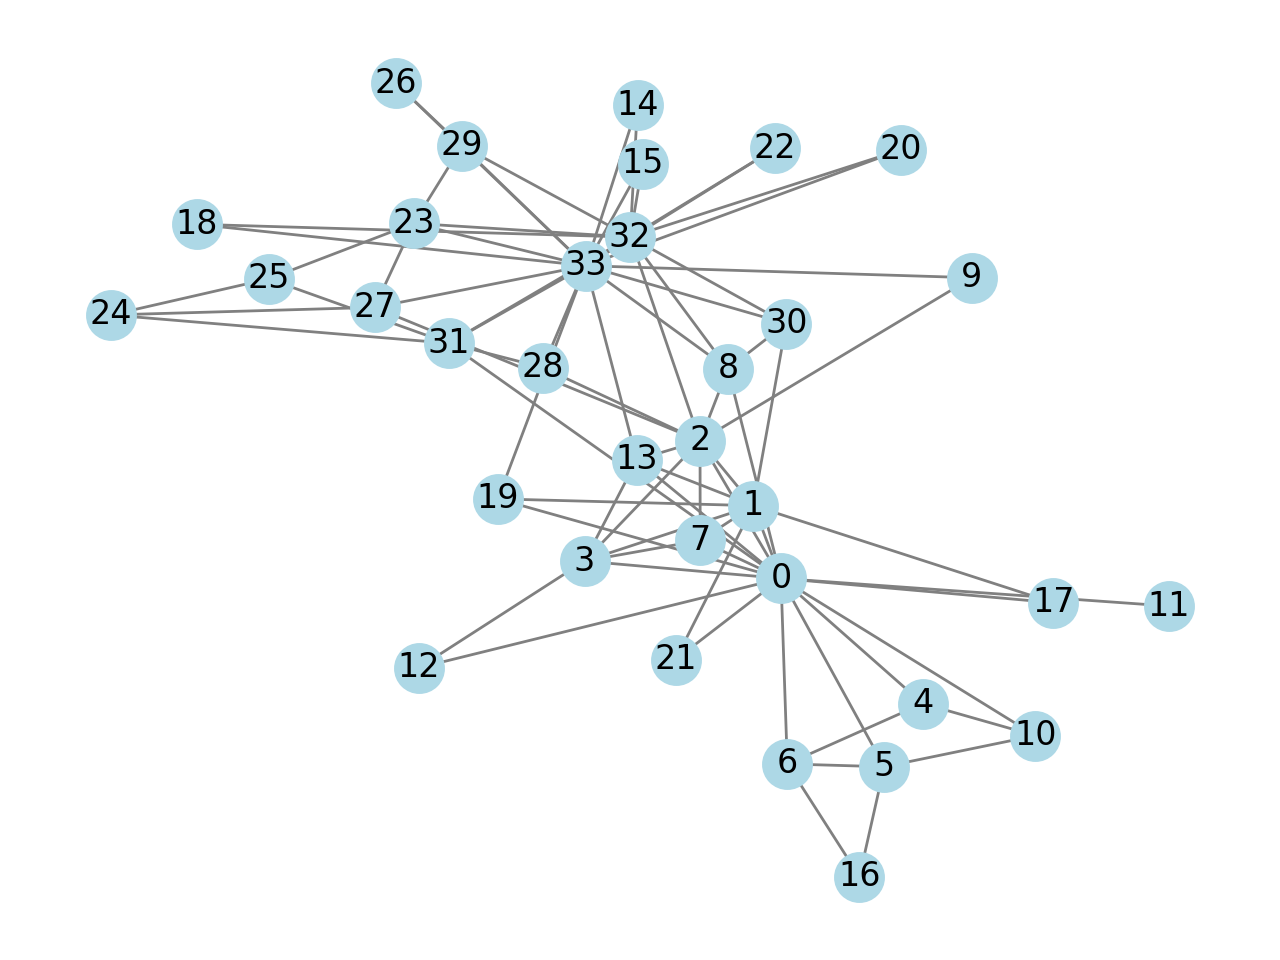

In [1]:
# ADD YOUR CODE HERE
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
# Write code to visualize the Karate Club network.
G1 = nx.karate_club_graph()
plt.figure()
nx.draw(G1, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()
# Include node labels in the visualization. 
# You should also save the x-y positions of the nodes for Q4.


### Question 2: Evaluating modularity (2 points)

Modularity maximization is one of the most commonly used network community detection methods. Write a function called `modularity` that computes the value of the modularity function:

$$Q=\frac{1}{2m} \sum_i \sum_j \left(A_{ij} - \frac{k_i k_j}{2m}\right) \delta(c_i, c_j).$$

The function should take the following inputs: (1) graph object `G` and (2) `np.array` object `c` that consists of the community assignments of the nodes in `G`. We will simplify the problem and will consider a division of the nodes into two mutually exclusive groups, and we will use the numbers 0 and 1 to encode these two groups. In other words, each element of the array `c` is either 0 or 1. Note that this function is not intended to maximize the value of modularity, but instead compute the value of the modularity for a given graph and given division of its nodes into communities (a partition). The function should return the value of modularity for the given inputs.

In [2]:
# ADD YOUR CODE HERE
# Write a function called `modularity` that computes the value of the modularity function:
def modularity(G, c):
    """"
    Input:
    G: a networkx graph
    c: a np.array of community assignments for each node in G
    Returns:
    @return: the modularity value Q of the community assignment c
    """
    m = G.number_of_edges()
    Q = 0
    for i in range(len(c)):
        for j in range(len(c)):
            a_ij = 1 if G.has_edge(i, j) else 0
            k_i = G.degree(i)
            k_j = G.degree(j)
            Q += (a_ij - k_i * k_j / (2 * m)) * (1 if c[i] == c[j] else 0)
    return Q / (2 * m)

### Question 3: Maximizing modularity (2 points)

Write function `maximize_modularity` that will maximize the value of modularity. The function should take two inputs: the graph object `G` and number of iterations `n_iter` (more on this below). The function should return  `Q_max` (the maximum value of modularity) and `c_max` (the value of the `c` array that corresponds to that maximum).

In practice, there are too many partitions of the nodes of the graph into two communities for us to consider. For that reason, we need to use some kind of heuristic. In this Question, you should generate a total of `n_iter` random partitions of the network into two communities. Each such partition is encoded by the array `c`. In other words, you have to generate `n_iter` random arrays `c` with elements 0 and 1 and identify the one (`c_max`) that gives rise to the highest value for modularity.

What value of `n_iter` is large enough? For the purposes of this Question, when writing and testing the code, it makes sense to use a small value (say, 1000). For computing your answer, you should use at a minimum `n_iter=10000`. This may or may not be large enough to find a good community structure. One million iterations would be better, but that may take a while to run depending on your implementation. The point here is not to identify the best partition, because that would be computationally expensive, but instead to write code that could do so if given enough time. (Translation: for grading purposes, `n_iter=10000` is fine.)

In [3]:
# ADD YOUR CODE HERE
# rite function `maximize_modularity` that will maximize the value of modularity. The function should take two inputs: the graph object `G` and number of iterations `n_iter` (more on this below). The function should return  `Q_max` (the maximum value of modularity) and `c_max` (the value of the `c` array that corresponds to that maximum).
def maximize_modularity(G, n_iter):
    """"
    Input:
    G: a networkx graph
    n_iter: number of iterations
    Returns:
    @return: Q_max: the maximum value of modularity
    @return: c_max: the value of the c array that corresponds to that maximum
    """
    Q_max = 0
    c_max = []
    for i in range(n_iter):
        c = np.random.randint(2, size=G.number_of_nodes())
        Q = modularity(G, c)
        if Q > Q_max:
            Q_max = Q
            c_max = c
    return Q_max, c_max

### Question 4: Displaying the maximum modularity partition (2 points)

Write code to visualize the maximum modularity partition by coloring each node according to its community membership. You should use the same layout for the graph (the same x-y coordinates for the nodes) as in Question 1.

The maximum modularity partition Q: 0.1984714003944773 c: [0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1]


<IPython.core.display.Javascript object>


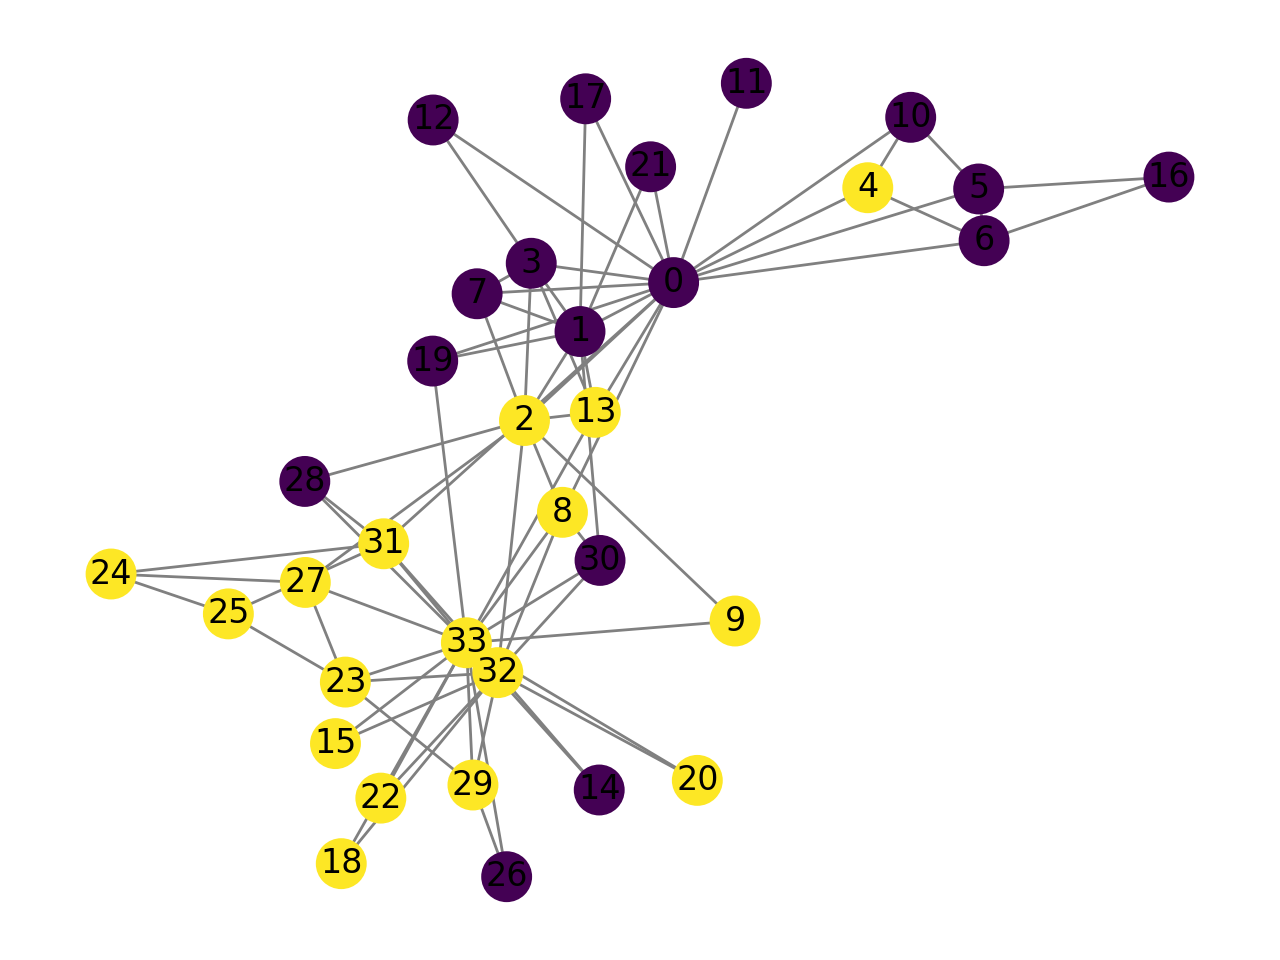

In [5]:
# ADD YOUR CODE HERE
# visualize the maximum modularity partition by coloring each node according to its community membership.
Q_max, c_max = maximize_modularity(G1, 10000)
print("The maximum modularity partition Q:", Q_max, "c:", c_max)
plt.figure()
nx.draw(G1, with_labels=True, node_color=c_max, edge_color='gray')
plt.show()
